# KNU 감정 사전 기반 분석

## 개요
- **분석 방법**: 렉시콘 기반 (KNU Sentiment Lexicon)
- **분석 대상**: 유튜브 연애 클립 댓글
- **감정 분류**: 긍정(Positive), 부정(Negative), 중립(Neutral)

## 데이터 소스
- 댓글 레벨: `output/results/knu_lexicon/comments_with_knu_sentiment.csv`
- 동영상 요약: `output/results/knu_lexicon/video_summary_knu.csv`
- 프로그램 요약: `output/results/knu_lexicon/program_summary_knu.csv`
- 전체 요약: `output/results/knu_lexicon/overall_summary_knu.json`

✓ 라이브러리 로드 완료
✓ font.family      : ['sans-serif']
✓ font.sans-serif  : ['Nanum Gothic', 'NanumGothic', 'AppleGothic']


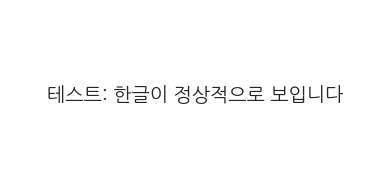

In [1]:
# =========================
# Visualization Environment Setup
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import json
from pathlib import Path

# -------------------------
# Seaborn style (FIRST)
# -------------------------
sns.set_style('whitegrid')
sns.set_palette('husl')

# -------------------------
# Font (Korean-safe, seaborn-compatible)
# -------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': [
        'Nanum Gothic',
        'NanumGothic',
        'AppleGothic',
        'Malgun Gothic',
        'DejaVu Sans'
    ],
    'axes.unicode_minus': False
})

# -------------------------
# Figure defaults
# -------------------------
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300
})

# -------------------------
# Global color scheme
# -------------------------
SENTIMENT_COLORS = {
    'positive': '#4CAF50',  # green
    'negative': '#F44336',  # red
    'neutral':  '#9E9E9E'   # gray
}

print("✓ 라이브러리 로드 완료")
print(f"✓ font.family      : {plt.rcParams['font.family']}")
print(f"✓ font.sans-serif  : {plt.rcParams['font.sans-serif'][:3]}")

# -------------------------
# Font sanity check
# -------------------------
fig, ax = plt.subplots(figsize=(4, 2))
ax.text(
    0.5, 0.5,
    '테스트: 한글이 정상적으로 보입니다',
    ha='center', va='center', fontsize=14
)
ax.axis('off')
plt.tight_layout()
plt.show()

## 1. 데이터 로드

In [2]:
# 전체 요약 통계 로드
with open('../output/results/knu_lexicon/overall_summary_knu.json', 'r', encoding='utf-8') as f:
    overall = json.load(f)

print("=" * 70)
print("📊 전체 통계 (KNU 감정 사전)")
print("=" * 70)
print(f"총 댓글 수: {overall['total_comments']:,}")
print(f"총 동영상 수: {overall['total_videos']}")
print(f"총 프로그램 수: {overall['total_programs']}")
print()
print("감정 분포:")
print(f"  긍정: {overall['positive_count']:,} ({overall['positive_ratio']:.1%})")
print(f"  부정: {overall['negative_count']:,} ({overall['negative_ratio']:.1%})")
print(f"  중립: {overall['neutral_count']:,} ({overall['neutral_ratio']:.1%})")
print()
print("평균 점수:")
print(f"  긍정 점수: {overall['avg_positive_score']:.3f}")
print(f"  부정 점수: {overall['avg_negative_score']:.3f}")
print(f"  총점: {overall['avg_total_score']:.3f} (±{overall['std_total_score']:.3f})")

📊 전체 통계 (KNU 감정 사전)
총 댓글 수: 156,655
총 동영상 수: 342
총 프로그램 수: 36

감정 분포:
  긍정: 27,042 (17.3%)
  부정: 15,162 (9.7%)
  중립: 114,451 (73.1%)

평균 점수:
  긍정 점수: 0.421
  부정 점수: 0.281
  총점: 0.140 (±1.294)


In [3]:
# 프로그램별 요약 로드
program_df = pd.read_csv('../output/results/knu_lexicon/program_summary_knu.csv', encoding='utf-8')
print(f"✓ 프로그램 수: {len(program_df)}")
program_df.head()

✓ 프로그램 수: 36


,program,video_count,total_comments,avg_positive_ratio,avg_negative_ratio,avg_neutral_ratio,avg_total_score,std_total_score,avg_matched_words
0,1920,10,2195,0.191253,0.046938,0.761809,0.259442,0.114224,0.351844
1,2억9천결혼전쟁,9,593,0.175380,0.132477,0.692143,0.040176,0.193112,0.529284
2,나는솔로 12~17,10,5036,0.149249,0.142669,0.708082,-0.059751,0.165814,0.553751
3,나는솔로 18~23,10,2549,0.138129,0.133214,0.728657,-0.036556,0.174116,0.468562
4,나는솔로 1~4,10,3443,0.166198,0.101437,0.732364,0.082024,0.130560,0.460997


In [4]:
# 동영상별 요약 로드
video_df = pd.read_csv('../output/results/knu_lexicon/video_summary_knu.csv', encoding='utf-8')
print(f"✓ 동영상 수: {len(video_df)}")
video_df.head()

✓ 동영상 수: 342


,video_id,total_comments,positive_count,negative_count,neutral_count,positive_ratio,negative_ratio,neutral_ratio,avg_positive_score,avg_negative_score,avg_total_score,std_total_score,avg_matched_words,program,video_title
0,-6lrTnCu_p4,66,12,17,37,0.181818,0.257576,0.560606,0.515152,0.833333,-0.318182,2.031741,0.969697,돌싱글즈1~2,[돌싱글즈] 혹시 사별은 없으시죠? 돌싱남녀의 선 넘는 토크 EP01_#2 MBN...
1,-_dH9Bx9D_s,834,256,183,395,0.306954,0.219424,0.473621,1.025180,0.859712,0.165468,1.833779,1.514388,모태솔로지만 연애는 하고 싶어,"0.5에서 1까지, 여명만의 플러팅 공식ㅣ모태솔로지만 연애는 하고 싶어ㅣ넷플릭스"
2,-orGRTtOISE,554,42,6,506,0.075812,0.010830,0.913357,0.111913,0.019856,0.092058,0.521344,0.115523,남의연애2,[ENG][남의연애2] 선우&민성 체험! 멜티드의 현장 🍦
3,08_IJOt_Wdg,60,15,4,41,0.250000,0.066667,0.683333,0.566667,0.233333,0.333333,1.297542,0.750000,나는솔로 5~11,[나는 SOLO] 자기소개 후 서로에 대한 호감은 어디로??? 그들의 후토크!! /...
4,0Eqq0aVsZ3o,541,88,94,359,0.162662,0.173752,0.663586,0.497227,0.543438,-0.046211,1.471862,0.785582,돌싱글즈4,[돌싱글즈4] 자녀 공개 앞 둔 두 남녀의 '작은 침묵'


## 2. 전체 감정 분포 시각화

## 3. 프로그램별 감정 분석

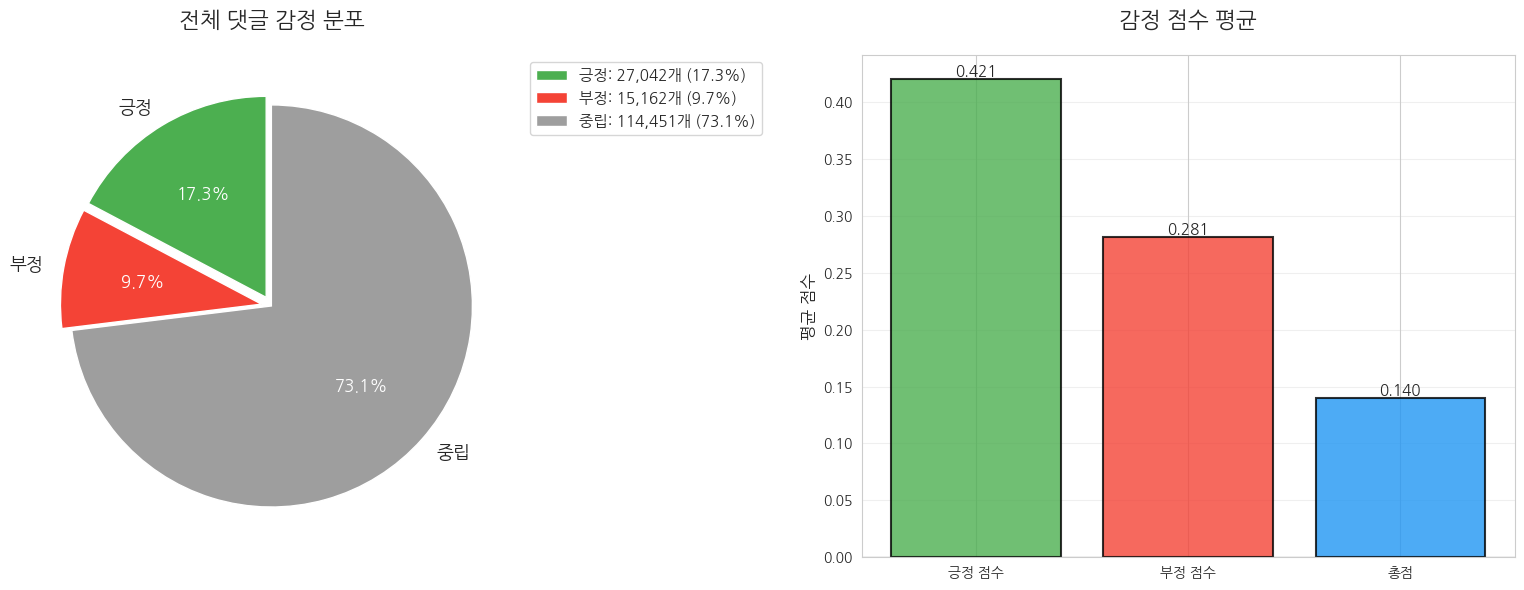

✓ 그래프 저장: output/figures/knu_overall_sentiment_analysis.png


In [5]:
# 감정 분포 파이 차트
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 파이 차트
sentiments = ['긍정', '부정', '중립']
counts = [overall['positive_count'], overall['negative_count'], overall['neutral_count']]
colors = [SENTIMENT_COLORS['positive'], SENTIMENT_COLORS['negative'], SENTIMENT_COLORS['neutral']]

wedges, texts, autotexts = ax1.pie(
    counts, 
    labels=sentiments, 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 13, 'weight': 'bold'},
    explode=(0.05, 0.05, 0)  # 긍정/부정 강조
)

# 퍼센트 텍스트 색상 조정
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax1.set_title('전체 댓글 감정 분포', fontsize=16, weight='bold', pad=20)

# 범례
legend_labels = [f'{s}: {c:,}개 ({c/sum(counts)*100:.1f}%)' for s, c in zip(sentiments, counts)]
ax1.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

# 막대 그래프 (감정 점수)
score_labels = ['긍정 점수', '부정 점수', '총점']
scores = [
    overall['avg_positive_score'], 
    overall['avg_negative_score'], 
    overall['avg_total_score']
]
bar_colors = [SENTIMENT_COLORS['positive'], SENTIMENT_COLORS['negative'], '#2196F3']

bars = ax2.bar(score_labels, scores, color=bar_colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# 값 레이블 추가
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.3f}',
             ha='center', va='bottom', fontsize=11, weight='bold')

ax2.set_ylabel('평균 점수', fontsize=12, weight='bold')
ax2.set_title('감정 점수 평균', fontsize=16, weight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.savefig('../output/figures/knu_overall_sentiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/knu_overall_sentiment_analysis.png")

In [6]:
# 프로그램별 데이터 준비 (댓글 수 상위 20개)
top_programs = program_df.nlargest(20, 'total_comments')

print("=" * 70)
print("📊 분석 대상 프로그램 (댓글 수 상위 20개)")
print("=" * 70)
print(f"선택된 프로그램 수: {len(top_programs)}")
print(f"총 댓글 수: {top_programs['total_comments'].sum():,}")
print(f"평균 댓글 수: {top_programs['total_comments'].mean():.0f}")
print()
print(top_programs[['program', 'total_comments', 'avg_total_score']].to_string(index=False))

📊 분석 대상 프로그램 (댓글 수 상위 20개)
선택된 프로그램 수: 20
총 댓글 수: 136,804
평균 댓글 수: 6840

                           program  total_comments  avg_total_score
                       솔로지옥2           20142         0.446874
                       남의연애2           13449         0.112074
                       솔로지옥4           12124         0.028233
                          썸바디2           11451         0.199311
                       솔로지옥1           10861         0.062930
                       솔로지옥3           10389         0.078721
                      돌싱글즈3            8577         0.384651
                  나는솔로 24~28            5497        -0.043038
                  나는솔로 12~17            5036        -0.059751
                         러브캐처2            4864         0.002702
모태솔로지만 연애는 하고 싶어            4836         0.223166
                           썸바디            3842         0.096225
                         너의연애         

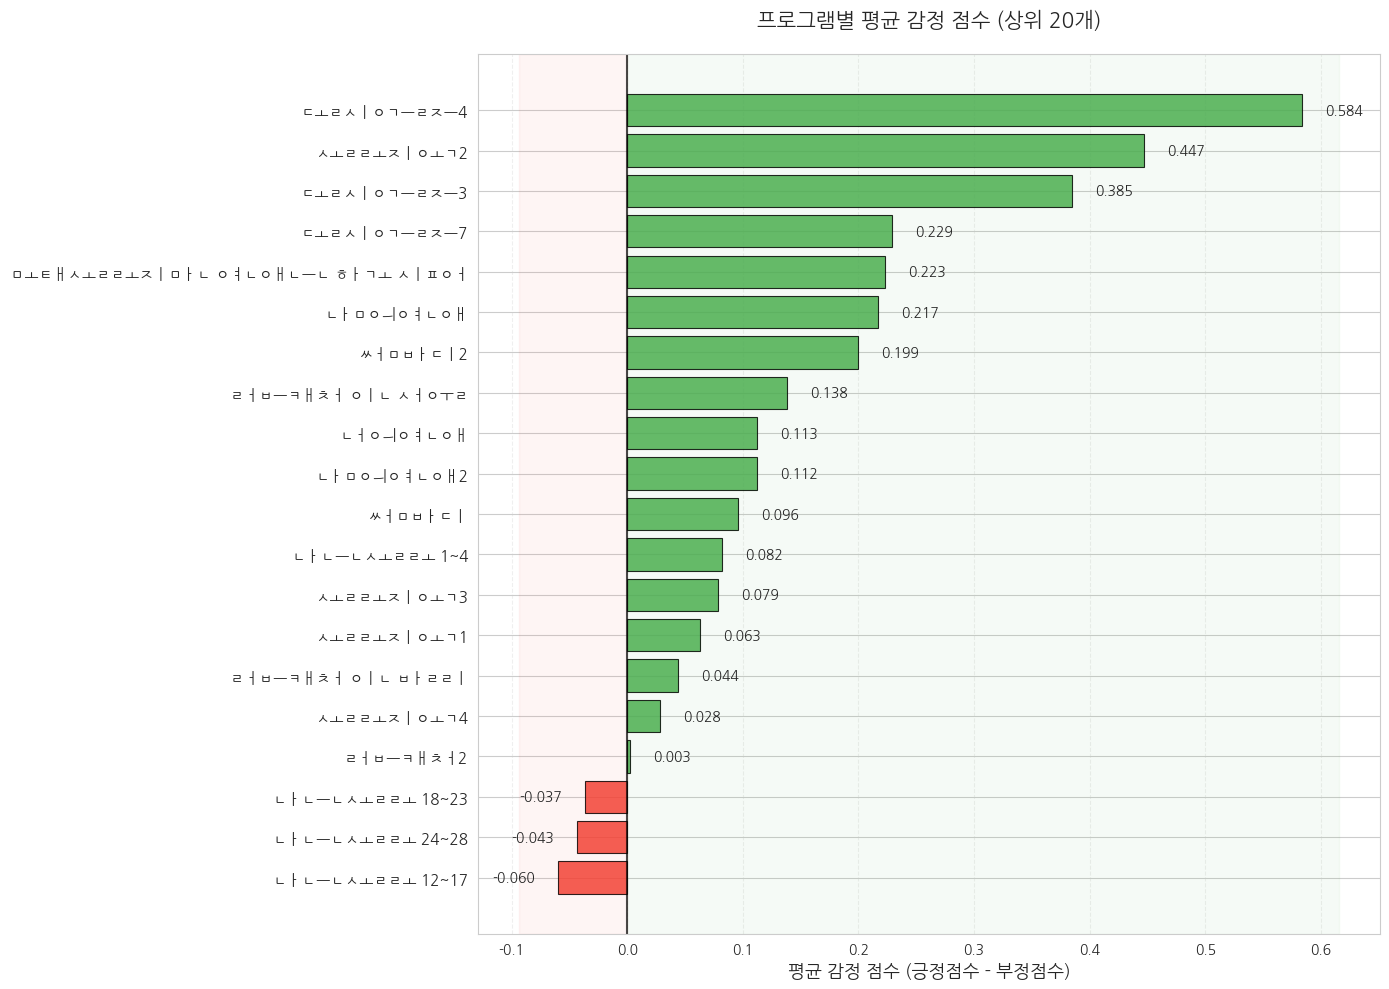

✓ 그래프 저장: output/figures/knu_program_avg_score.png


In [7]:
# 프로그램별 평균 감정 점수 (개선)
fig, ax = plt.subplots(figsize=(14, 10))

top_programs_sorted = top_programs.sort_values('avg_total_score', ascending=True)

# 색상: 긍정은 초록, 부정은 빨강
colors = [SENTIMENT_COLORS['negative'] if score < 0 else SENTIMENT_COLORS['positive'] 
          for score in top_programs_sorted['avg_total_score']]

bars = ax.barh(range(len(top_programs_sorted)), top_programs_sorted['avg_total_score'], 
               color=colors, alpha=0.85, edgecolor='black', linewidth=0.8)

# 값 레이블 추가
for i, (idx, row) in enumerate(top_programs_sorted.iterrows()):
    score = row['avg_total_score']
    label = f"{score:.3f}"
    # 음수면 왼쪽, 양수면 오른쪽에 표시
    x_pos = score + (0.02 if score > 0 else -0.02)
    ha = 'left' if score > 0 else 'right'
    ax.text(x_pos, i, label, ha=ha, va='center', fontsize=10, weight='bold')

ax.set_yticks(range(len(top_programs_sorted)))
ax.set_yticklabels(top_programs_sorted['program'], fontsize=11)
ax.set_xlabel('평균 감정 점수 (긍정점수 - 부정점수)', fontsize=13, weight='bold')
ax.set_title('프로그램별 평균 감정 점수 (상위 20개)', fontsize=15, weight='bold', pad=20)

# 0점 기준선
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)

# 그리드
ax.grid(axis='x', alpha=0.3, linestyle='--')

# 배경색 추가 (긍정/부정 영역 구분)
ax.axvspan(0, ax.get_xlim()[1], alpha=0.05, color=SENTIMENT_COLORS['positive'])
ax.axvspan(ax.get_xlim()[0], 0, alpha=0.05, color=SENTIMENT_COLORS['negative'])

plt.tight_layout()
plt.savefig('../output/figures/knu_program_avg_score.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/knu_program_avg_score.png")

## 4. 동영상별 감정 편차 분석

In [8]:
# 기술 통계
print("=" * 70)
print("📊 동영상별 감정 점수 기술 통계")
print("=" * 70)
print(video_df[['avg_total_score', 'avg_positive_score', 'avg_negative_score']].describe())
print()

# 상관관계 분석
print("=" * 70)
print("📊 상관관계 분석")
print("=" * 70)
correlation = video_df[['total_comments', 'positive_ratio', 'negative_ratio', 'avg_total_score']].corr()
print(correlation)

📊 동영상별 감정 점수 기술 통계
       avg_total_score  avg_positive_score  avg_negative_score
count       342.000000          342.000000          342.000000
mean          0.144649            0.380524            0.235875
std           0.316502            0.317861            0.191767
min          -0.439331            0.000000            0.000000
25%           0.000000            0.204330            0.089642
50%           0.094653            0.305699            0.198854
75%           0.210364            0.454311            0.319641
max           3.000000            3.000000            0.968886

📊 상관관계 분석
                 total_comments  positive_ratio  negative_ratio  \
total_comments         1.000000        0.026456        0.144662   
positive_ratio         0.026456        1.000000        0.052734   
negative_ratio         0.144662        0.052734        1.000000   
avg_total_score       -0.012805        0.825470       -0.422054   

                 avg_total_score  
total_comments         -0.012805

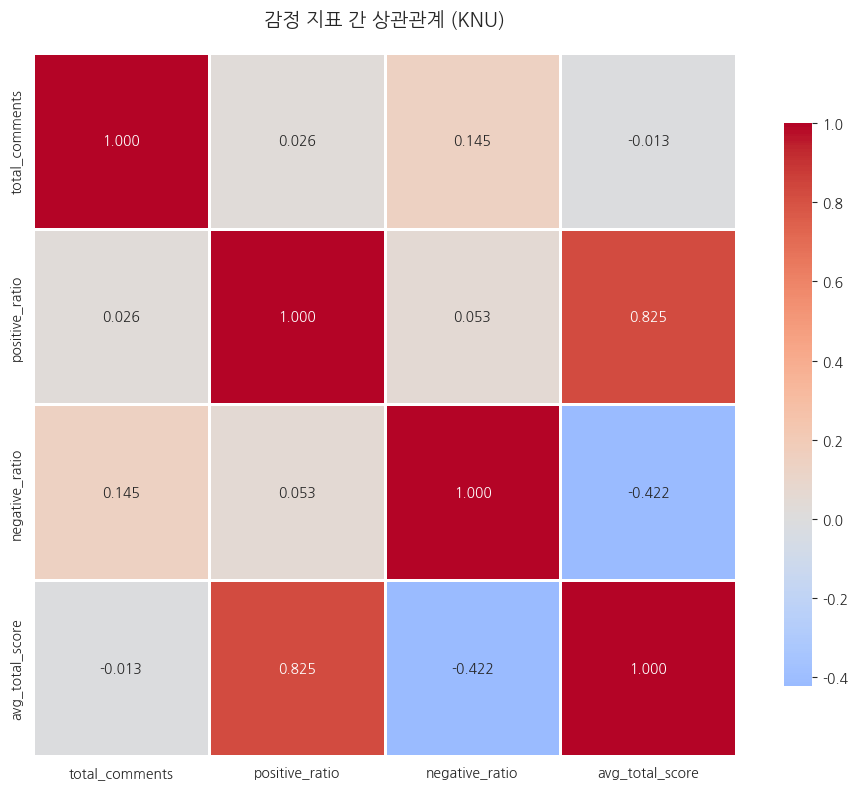

✓ 그래프 저장: output/figures/knu_correlation_heatmap.png


In [9]:
# 상관관계 히트맵
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    correlation, 
    annot=True, 
    fmt='.3f', 
    cmap='coolwarm', 
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8},
    ax=ax
)

ax.set_title('감정 지표 간 상관관계 (KNU)', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('../output/figures/knu_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/knu_correlation_heatmap.png")

## 4. 인터랙티브 시각화 (Interactive Plots)
- **Dot Plot**: 프로그램별 개별 동영상 감정 점수 분포
- **Time Series**: 업로드 일자별 감정 점수 변화 추이

In [10]:
# ---------------------------------------------------------
# 1. 메타데이터 로드 및 병합 (동영상 업로드 일자)
# ---------------------------------------------------------
print("=" * 70)
print("📅 동영상 업로드 일자 메타데이터 로드")
print("=" * 70)

# merged_comments.csv 로드 (Video ID와 Video Upload Date 매핑용)
# 상대 경로 주의: analysis 폴더에서 실행된다고 가정하면 ../src/..
meta_df = pd.read_csv('../src/merged_comments.csv', 
                      usecols=['Video ID', 'Video Upload Date'], 
                      encoding='utf-8')

# 중복 제거 (동영상별 하나만 남김)
video_dates = meta_df.drop_duplicates(subset=['Video ID']).rename(columns={
    'Video ID': 'video_id', 
    'Video Upload Date': 'upload_date'
})

# 날짜 형식 변환
video_dates['upload_date'] = pd.to_datetime(video_dates['upload_date'])

# 기존 video_df와 병합
if 'upload_date' not in video_df.columns:
    video_df = video_df.merge(video_dates, on='video_id', how='left')
    print(f"✓ 날짜 정보 병합 완료: {len(video_df)}개 동영상")
else:
    print("✓ 이미 날짜 정보가 포함되어 있습니다.")

print("-" * 50)
print(video_df[['video_id', 'upload_date', 'program']].head(3))

📅 동영상 업로드 일자 메타데이터 로드
✓ 날짜 정보 병합 완료: 342개 동영상
--------------------------------------------------
      video_id upload_date                             program
0  -6lrTnCu_p4  2021-09-09                      돌싱글즈1~2
1  -_dH9Bx9D_s  2025-07-22  모태솔로지만 연애는 하고 싶어
2  -orGRTtOISE  2023-08-12                         남의연애2


In [11]:
# ---------------------------------------------------------
# 2. Plotly 라이브러리 설정
# ---------------------------------------------------------
import plotly.express as px
import plotly.io as pio

# 기본 템플릿 설정
pio.templates.default = "plotly_white"

print("✓ Plotly 라이브러리 로드 완료")

✓ Plotly 라이브러리 로드 완료


In [12]:
# ---------------------------------------------------------
# 3. 인터랙티브 닷플롯 (Interactive Dot Plot)
#    : 개별 동영상 (프로그램별 색상)
# ---------------------------------------------------------
fig1 = px.strip(
    video_df, 
    x="program", 
    y="avg_total_score", 
    color="program", 
    hover_data=["video_title", "total_comments", "upload_date"],
    title="<b>프로그램별 동영상 감정 점수 분포</b> (Interactive Dot Plot)",
    labels={"avg_total_score": "평균 감정 점수 (Sentiment Score)", "program": "프로그램"},
    height=600
)

fig1.update_layout(
    xaxis_tickangle=-45,
    showlegend=False, # x축 라벨이 있으므로 범례 생략 가능
    title_font_size=20
)

# 데이터 포인트(점) 투명도 및 크기 조절
fig1.update_traces(marker=dict(size=8, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))

fig1.show()

In [13]:
# ---------------------------------------------------------
# 4. 시계열 그래프 (Time Series Plot)
#    : 동영상 업로드 일자 기준
# ---------------------------------------------------------
# 날짜 데이터가 있는 것만 필터링
plot_df = video_df.dropna(subset=['upload_date']).sort_values('upload_date')

fig2 = px.scatter(
    plot_df, 
    x="upload_date", 
    y="avg_total_score", 
    color="program", 
    size="total_comments", # 댓글 수에 따라 크기(버블) 조절 (선택사항, 제거 가능)
    hover_data=["video_title"],
    title="<b>시간 흐름에 따른 동영상 감정 추이</b> (Time Series)",
    labels={
        "upload_date": "업로드 일자 (Upload Date)", 
        "avg_total_score": "평균 감정 점수",
        "total_comments": "댓글 수 (Circle Size)",
        "program": "프로그램"
    },
    height=600
)

fig2.update_xaxes(
    tickformat="%Y-%m-%d",
    title_font=dict(size=14)
)
fig2.update_yaxes(title_font=dict(size=14))
fig2.update_layout(title_font_size=20)

# 기준선 (0점) 추가
fig2.add_hline(y=0, line_dash="dash", line_color="gray", annotation_text="중립 (0)")

fig2.show()

## 6. 주요 인사이트

In [14]:
# 가장 긍정적인 프로그램
most_positive = program_df.nlargest(5, 'avg_positive_ratio')[['program', 'avg_positive_ratio', 'total_comments']]
print("=" * 70)
print("😊 가장 긍정적인 프로그램 (상위 5개)")
print("=" * 70)
print(most_positive.to_string(index=False))
print()

# 가장 부정적인 프로그램
most_negative = program_df.nlargest(5, 'avg_negative_ratio')[['program', 'avg_negative_ratio', 'total_comments']]
print("=" * 70)
print("😞 가장 부정적인 프로그램 (상위 5개)")
print("=" * 70)
print(most_negative.to_string(index=False))
print()

# 감정 편차가 큰 프로그램
high_variance = program_df.nlargest(5, 'std_total_score')[['program', 'std_total_score', 'avg_total_score']]
print("=" * 70)
print("📊 감정 편차가 큰 프로그램 (상위 5개)")
print("=" * 70)
print(high_variance.to_string(index=False))

😊 가장 긍정적인 프로그램 (상위 5개)
          program  avg_positive_ratio  total_comments
     돌싱글즈4            0.333170            2564
     돌싱글즈3            0.282526            8577
잠만 자는 사이            0.261669             415
      솔로지옥2            0.255619           20142
     돌싱글즈7            0.254906            2884

😞 가장 부정적인 프로그램 (상위 5개)
             program  avg_negative_ratio  total_comments
소년 소녀 연애하다            0.181818              11
    나는솔로 12~17            0.142669            5036
         솔로지옥3            0.142317           10389
    나는솔로 18~23            0.133214            2549
        돌싱글즈3            0.132966            8577

📊 감정 편차가 큰 프로그램 (상위 5개)
          program  std_total_score  avg_total_score
잠만 자는 사이         0.936409         0.601879
     돌싱글즈3         0.584476         0.384651
     돌싱글즈4         0.557730         0.583527
   돌싱글즈5~6         0.556219         0.350090
  

## 7. 결론

### KNU 감정 사전 분석 요약

1. **전체 감정 분포**
   - 렉시콘 기반 분석을 통해 댓글의 긍정/부정/중립 비율 파악
   - 평균 감정 점수 및 표준편차 확인

2. **프로그램별 특성**
   - 프로그램마다 뚜렷한 감정 패턴 차이 존재
   - 특정 프로그램은 일관되게 긍정적/부정적 반응

3. **동영상별 편차**
   - 같은 프로그램 내에서도 동영상별 감정 편차 존재
   - 특정 에피소드나 출연자에 따른 반응 차이 가능성

4. **한계점**
   - 렉시콘 기반 분석의 한계: 문맥 파악 어려움
   - 신조어, 은어, 이모티콘 등 처리 제한
   - 딥러닝 기반 분석과의 비교 필요